In [92]:
!pip install --upgrade nbformat
!pip install plotly
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install -U scikit-learn

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Base de dados de crédito

- Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset

In [94]:
base_credit = pd.read_csv("./assets/credit_data.csv")
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


### **Análise da tabela**

- Campo `clientid`: representa o identificador do cliente. Embora seja um número ela serve como identificador único para categorizar um cliente, e não está sujeita a uma ordenação. Desse modo é uma variável categórica nominal

- Campo `income`: representa a renda anual do cliente. Por apresentar valores numéricos reais, é uma variável numérica discreta.

- Campo `age`: representa a idade do cliente. Por apresentar valores numéricos reais, é uma variável numérica discreta.

- Campo `loan`: representa a dívida do cliente. Por apresentar valores numéricos reais, é uma variável numérica discreta.

- Campo `default`: indica se o cliente pagou (0) ou não (1) a dívida. Pode apresentar um conjunto de valores finitos (0 e 1), ela se encaixa em uma variável numérica discreta.

In [95]:
base_credit.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [96]:
base_credit.tail()

,clientid,income,age,loan,default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [97]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [98]:
base_credit[base_credit["income"] >= 69995.685578]

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [99]:
base_credit[base_credit["loan"] <= 1.377630]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


In [100]:
np.unique(base_credit["default"], return_counts=True)

(array([0, 1]), array([1717,  283]))

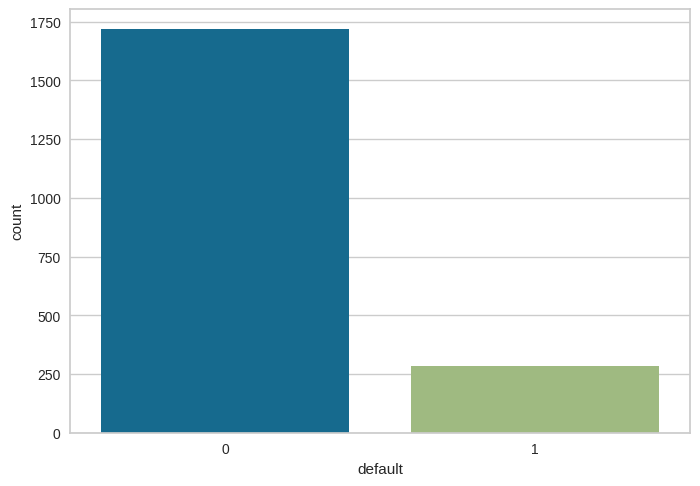

In [101]:
sns.countplot(x = base_credit["default"]);

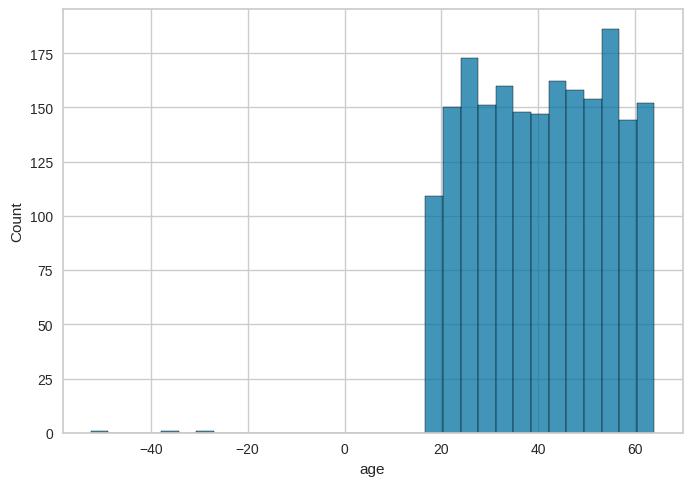

In [102]:
sns.histplot(x = base_credit["age"]);

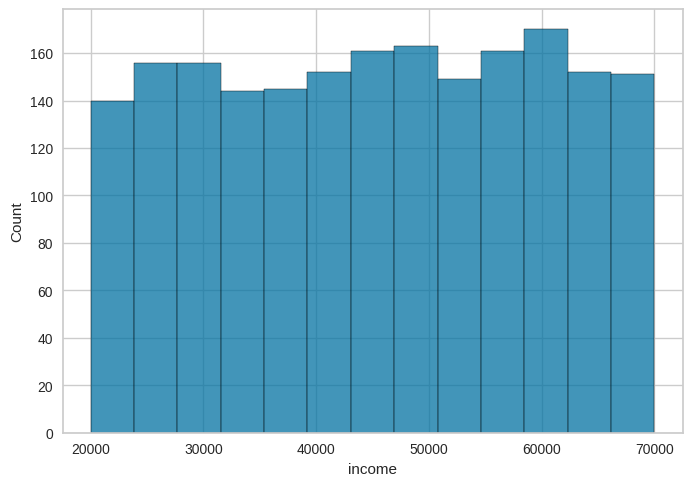

In [103]:
sns.histplot(x = base_credit["income"]);

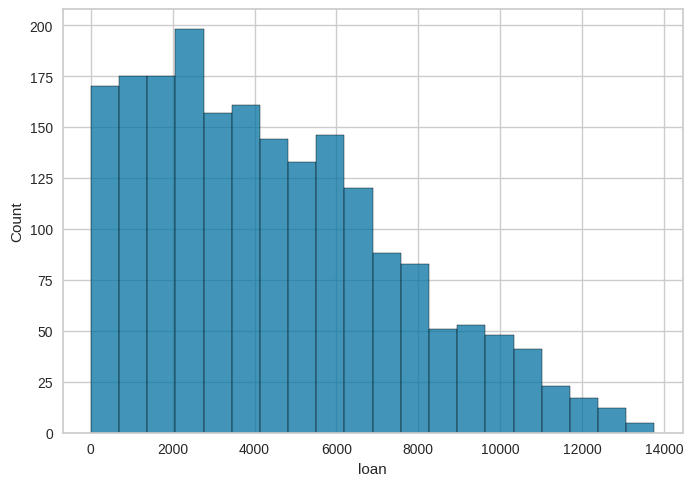

In [104]:
sns.histplot(x = base_credit["loan"]);

# Gráfico de dispersão (_scatter_)

In [105]:
grafico = px.scatter_matrix(base_credit, dimensions=["age", "income", "loan"], color="default")
grafico.show()

# Tratamento de valores inconsistentes

In [106]:
base_credit.loc[base_credit["age"] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


Em caso da maioria dos dados de uma coluna forem inconsistentes, é recomendado apagar a coluna inteira. Veja o código baixo:

In [107]:
treated_base_credit = base_credit.drop("age", axis=1) # axis = 1 <=> coluna
treated_base_credit

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


Caso contrário, se apenas uma minoria dos dados dessa coluna apresentam inconsistência, basta apagar esses registros (linha inteira) com a informações incorretas. Veja o exemplo abaixo:

In [108]:
treated_base_credit = base_credit.drop(base_credit[base_credit["age"] < 0].index)
treated_base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [109]:
base_credit[base_credit["age"] < 0].index

Index([15, 21, 26], dtype='int64')

In [110]:
invalid_ages = base_credit[base_credit["age"] < 0]
invalid_ages

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [111]:
treated_base_credit.loc[treated_base_credit["age"] < 0]

,clientid,income,age,loan,default


Outra forma de tratar os dados inconsistentes é substituí-los pela média

In [112]:
treated_base_credit.mean()

clientid     1001.970456
income      45326.596720
age            40.927700
loan         4442.124566
default         0.141713
dtype: float64

In [113]:
base_credit["age"].mean()

40.80755937840458

In [114]:
base_credit["age"][base_credit["age"] > 0].mean()

40.92770044906149

In [115]:
average = base_credit["age"][base_credit["age"] > 0].mean()
base_credit.loc[base_credit["age"] < 0, "age"] = average

In [116]:
base_credit.loc[base_credit["age"] < 0]

,clientid,income,age,loan,default


In [117]:
base_credit.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


# Tratamento de dados faltantes

In [118]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [119]:
base_credit.loc[pd.isnull(base_credit["age"])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [120]:
age_average = base_credit["age"].mean()
base_credit["age"].fillna(age_average, inplace=True)

In [121]:
base_credit.loc[pd.isnull(base_credit["age"])]

,clientid,income,age,loan,default


In [122]:
base_credit.loc[
    (base_credit["clientid"] == 29) | 
    (base_credit["clientid"] == 31) | 
    (base_credit["clientid"] == 32)
]

,clientid,income,age,loan,default
28,29,59417.805406,40.9277,2082.625938,0
30,31,48528.852796,40.9277,6155.784670,0
31,32,23526.302555,40.9277,2862.010139,0


In [123]:
base_credit.loc[base_credit["clientid"].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.9277,2082.625938,0
30,31,48528.852796,40.9277,6155.784670,0
31,32,23526.302555,40.9277,2862.010139,0


# Divisão entre previsores (`x`) e classe (`y`)

In [124]:
X_credit = base_credit.iloc[:, 1:4].values
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [125]:
Y_credit = base_credit.iloc[:, 4].values
Y_credit

array([0, 0, 0, ..., 1, 0, 0])

# Escalonamento de valores

In [126]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [127]:
X_credit[:,0].min() # Menor renda

20014.4894700497

In [128]:
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [129]:
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [130]:
from sklearn.preprocessing import StandardScaler

scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [131]:
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min()

(-1.7676158019964077, -1.7264154144794286, -1.4592791099462408)

In [132]:
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max()

(1.7220222385319197, 1.739366520151568, 3.0616609141708273)

# Divisão da base de dados

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_credit_train, X_credit_test, Y_credit_train, Y_credit_test = train_test_split(
    X_credit, Y_credit, 
    test_size=0.25, 
    random_state=0 # ter a mesma divisão da base de dados
)

In [135]:
X_credit_train.shape

(1500, 3)

In [136]:
Y_credit_train.shape

(1500,)

In [137]:
X_credit_test.shape

(500, 3)

In [138]:
Y_credit_test.shape

(500,)

# Salvar as variáveis

In [139]:
import pickle

In [140]:
with open("credit.pkl", mode="wb") as file:
    pickle.dump([X_credit_train, Y_credit_train, X_credit_test, Y_credit_test], file)

# Naive Bayes

In [141]:
base_credit_risk = pd.read_csv("./assets/risco_credito.csv")

In [142]:
base_credit_risk

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [143]:
X_credit_risk = base_credit_risk.iloc[:, 0:4].values
X_credit_risk

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [144]:
y_risk_credit = base_credit_risk.iloc[:, 4].values
y_risk_credit

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [145]:
from sklearn.preprocessing import LabelEncoder

label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [146]:
X_credit_risk[:, 0] = label_encoder_historia.fit_transform(X_credit_risk[:, 0])
X_credit_risk[:, 1] = label_encoder_divida.fit_transform(X_credit_risk[:, 1])
X_credit_risk[:, 2] = label_encoder_historia.fit_transform(X_credit_risk[:, 2])
X_credit_risk[:, 3] = label_encoder_renda.fit_transform(X_credit_risk[:, 3])

In [147]:
import pickle

with open("credit_risk.pkl", "wb") as file:
    pickle.dump([X_credit_risk, y_risk_credit], file)

In [148]:
from sklearn.naive_bayes import GaussianNB

naive_credit_risk = GaussianNB()
naive_credit_risk.fit(X_credit_risk, y_risk_credit)

GaussianNB()

Exemplo de registros

- história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)

- história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)

In [149]:
predict = naive_credit_risk.predict([
    [0, 0, 1, 2],
    [2, 0, 0, 0]
])

In [150]:
predict

array(['baixo', 'moderado'], dtype='<U8')

In [151]:
naive_credit_risk.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [152]:
naive_credit_risk.class_count_

array([6., 5., 3.])

In [153]:
naive_credit_risk.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

# Base credit data

In [154]:
with open("credit.pkl", "rb") as file:
    X_credit_train, y_credit_train, X_credit_test, y_credit_test = pickle.load(file)

In [155]:
X_credit_train.shape, y_credit_train.shape

((1500, 3), (1500,))

In [156]:
X_credit_test.shape, y_credit_test.shape

((500, 3), (500,))

In [157]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_train, y_credit_train)

GaussianNB()

In [158]:
predict = naive_credit_data.predict(X_credit_test)

In [159]:
predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [160]:
y_credit_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [161]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [162]:
accuracy_score(y_credit_test, predict)

0.938

In [163]:
confusion_matrix(y_credit_test, predict)

array([[428,   8],
       [ 23,  41]])

In [164]:
from yellowbrick.classifier import ConfusionMatrix

0.938

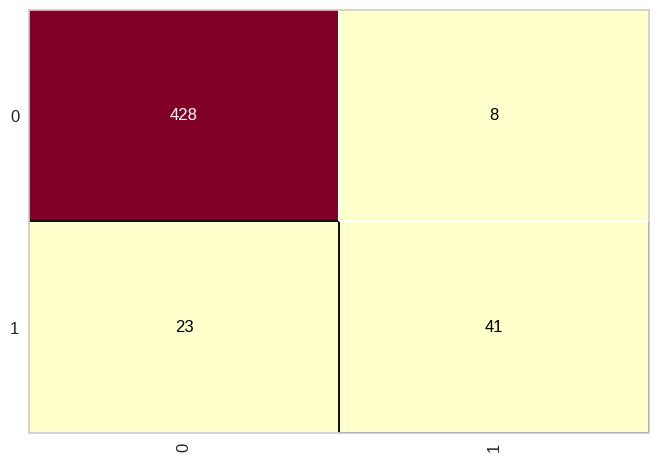

In [165]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [166]:
print(classification_report(y_credit_test, predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



# Árvore de decisão

In [167]:
from sklearn.tree import DecisionTreeClassifier

In [168]:
import pickle
with open("credit_risk.pkl", "rb") as file:
    X_credit_risk, y_credit_risk = pickle.load(file)

In [169]:
X_credit_risk

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [179]:
credit_risk_tree = DecisionTreeClassifier(criterion="entropy")
credit_risk_tree.fit(X_credit_risk, y_credit_risk)

DecisionTreeClassifier(criterion='entropy')

In [180]:
credit_risk_tree.feature_importances_

array([0.41607015, 0.10294068, 0.03885431, 0.44213486])

In [175]:
credit_risk_tree.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

InvalidParameterError: The 'class_names' parameter of plot_tree must be an instance of 'list' or None. Got array(['alto', 'baixo', 'moderado'], dtype=object) instead.

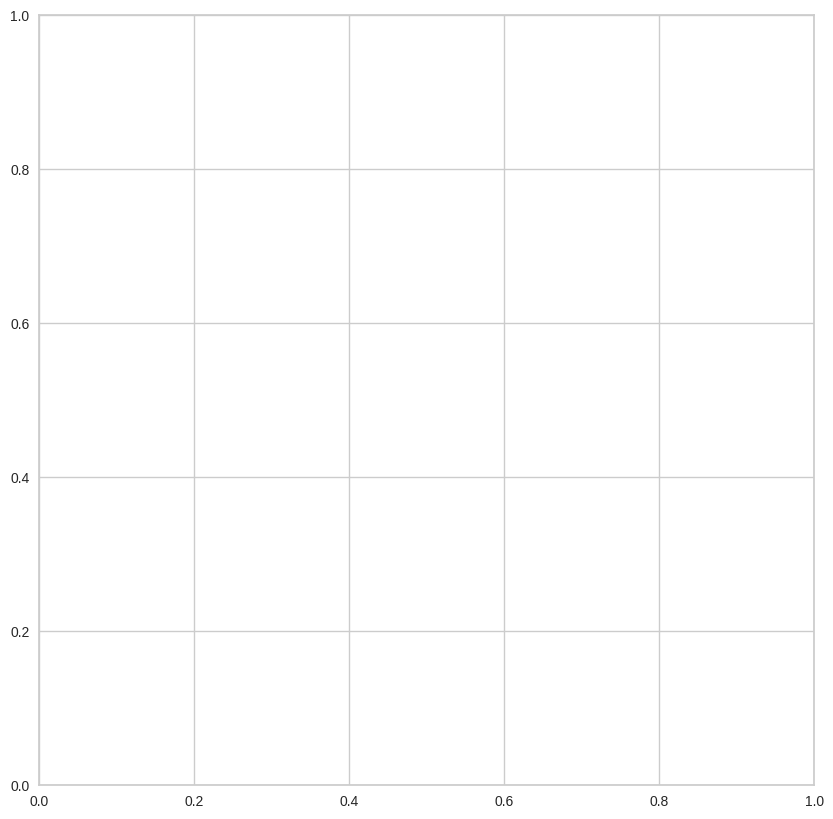

In [185]:
from sklearn import tree

forecasters = ["história", "dívida", "garantias", "renda"]

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
tree.plot_tree(credit_risk_tree, feature_names=forecasters, class_names=credit_risk_tree.classes_, filled=True)

In [184]:
predicts = credit_risk_tree.predict([
    [0, 0, 1, 2],
    [2, 0, 0 , 0]
])
predicts

array(['baixo', 'alto'], dtype=object)